In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from scipy.optimize import linprog

In [2]:
energy_data = pd.read_csv('energy_consumption.csv')
weather_data = pd.read_csv('weather_data.csv')

In [3]:
display(energy_data.head())
display(weather_data.head())

,timestamp,energy_consumption
0,01-01-2023 00:00,100
1,01-01-2023 01:00,105
2,01-01-2023 02:00,110
3,01-01-2023 03:00,115
4,01-01-2023 04:00,120


,timestamp,temperature,humidity,wind_speed
0,01-01-2023 00:00,20,30,5
1,01-01-2023 01:00,19,32,5
2,01-01-2023 02:00,18,35,6
3,01-01-2023 03:00,17,33,7
4,01-01-2023 04:00,16,31,6


In [4]:
data = pd.merge(energy_data, weather_data, on='timestamp')


In [5]:
display(data.head())


,timestamp,energy_consumption,temperature,humidity,wind_speed
0,01-01-2023 00:00,100,20,30,5
1,01-01-2023 01:00,105,19,32,5
2,01-01-2023 02:00,110,18,35,6
3,01-01-2023 03:00,115,17,33,7
4,01-01-2023 04:00,120,16,31,6


In [6]:
data['timestamp'] = pd.to_datetime(data['timestamp'])
data['hour'] = data['timestamp'].dt.hour
data['day_of_week'] = data['timestamp'].dt.dayofweek
data['month'] = data['timestamp'].dt.month


In [7]:
feature_columns = ['temperature', 'humidity', 'wind_speed', 'hour', 'day_of_week', 'month']

In [8]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[feature_columns])


In [9]:
data_scaled = pd.DataFrame(data_scaled, columns=feature_columns)

In [10]:
data_scaled['energy_consumption'] = data['energy_consumption']


In [11]:
display(data_scaled.head())

,temperature,humidity,wind_speed,hour,day_of_week,month,energy_consumption
0,0.583333,0.736842,0.50,0.000000,0.0,0.0,100
1,0.500000,0.842105,0.50,0.043478,0.0,0.0,105
2,0.416667,1.000000,0.75,0.086957,0.0,0.0,110
3,0.333333,0.894737,1.00,0.130435,0.0,0.0,115
4,0.250000,0.789474,0.75,0.173913,0.0,0.0,120


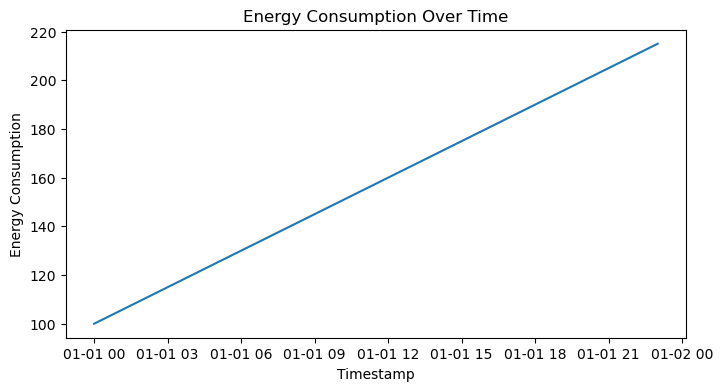

In [12]:
plt.figure(figsize=(8, 4))
plt.plot(data['timestamp'], data['energy_consumption'])
plt.xlabel('Timestamp')
plt.ylabel('Energy Consumption')
plt.title('Energy Consumption Over Time')
plt.show()

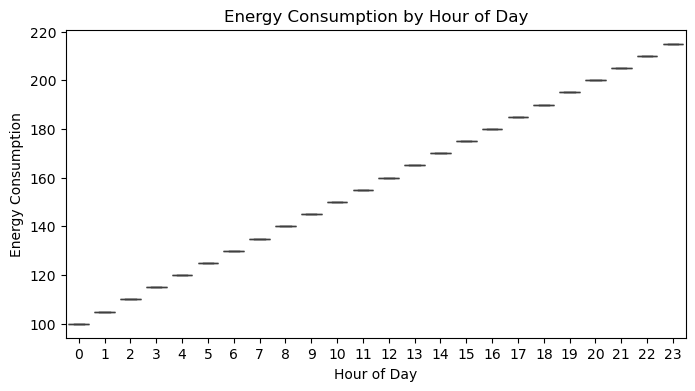

In [25]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='hour', y='energy_consumption', data=data)
plt.xlabel('Hour of Day')
plt.ylabel('Energy Consumption')
plt.title('Energy Consumption by Hour of Day')
plt.show()

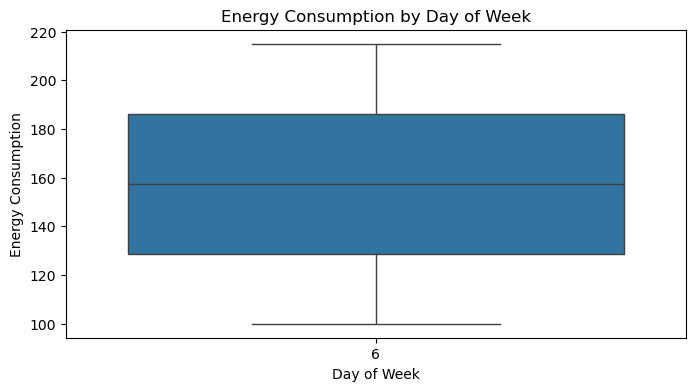

In [27]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='day_of_week', y='energy_consumption', data=data)
plt.xlabel('Day of Week')
plt.ylabel('Energy Consumption')
plt.title('Energy Consumption by Day of Week')
plt.show()

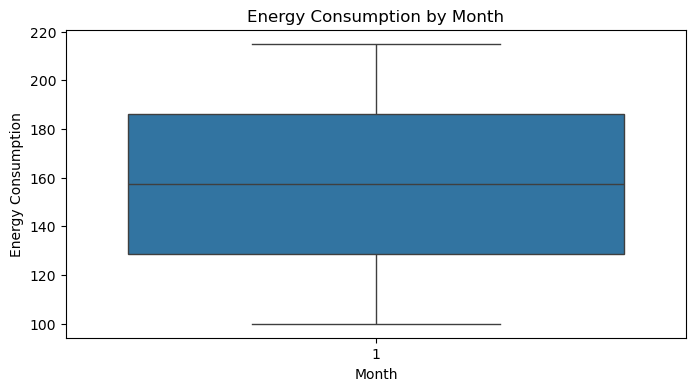

In [29]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='month', y='energy_consumption', data=data)
plt.xlabel('Month')
plt.ylabel('Energy Consumption')
plt.title('Energy Consumption by Month')
plt.show()

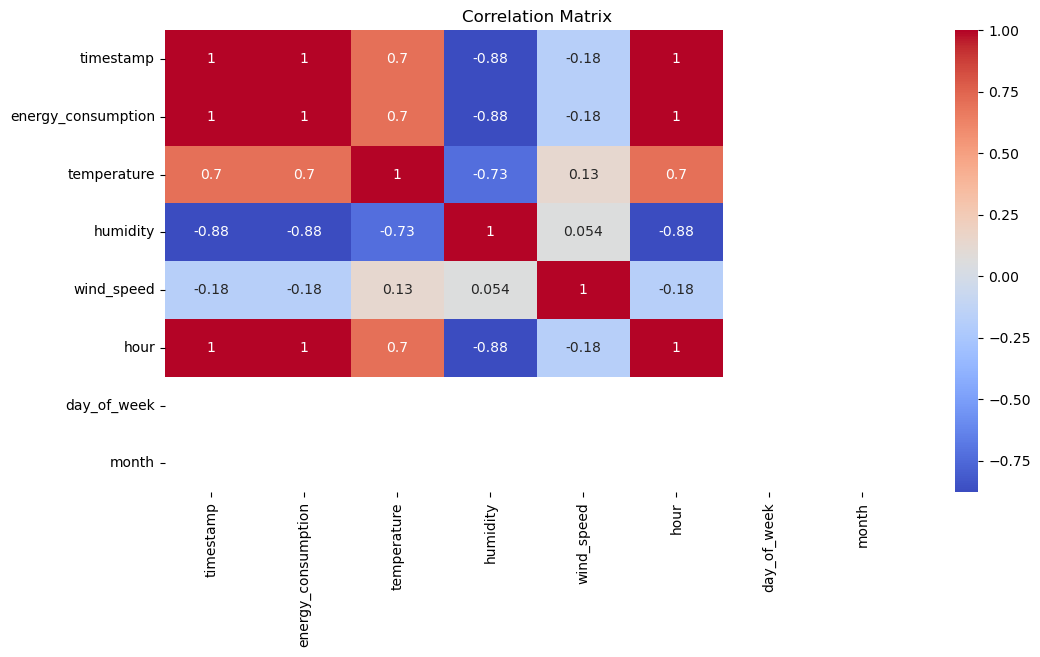

In [43]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [45]:
X = data_scaled.drop('energy_consumption', axis=1)
y = data_scaled['energy_consumption']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [47]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [49]:
y_pred = model.predict(X_test)


In [51]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'MAE: {mae}, RMSE: {rmse}')

MAE: 4.589999999999998, RMSE: 7.953144032393728


In [53]:
future_data = pd.read_csv('future_weather_data.csv')


In [55]:
future_data['timestamp'] = pd.to_datetime(future_data['timestamp'])
future_data['hour'] = future_data['timestamp'].dt.hour
future_data['day_of_week'] = future_data['timestamp'].dt.dayofweek
future_data['month'] = future_data['timestamp'].dt.month

In [57]:
future_data_preprocessed = future_data[feature_columns]


In [59]:
future_data_scaled = scaler.transform(future_data_preprocessed)

In [61]:
future_predictions = model.predict(future_data_scaled)

C:\Users\deepa\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


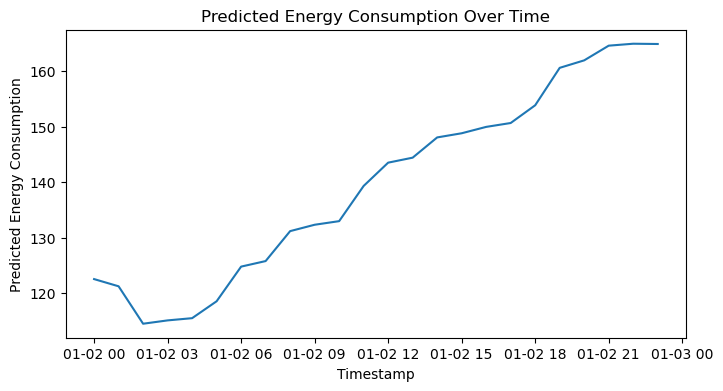

In [63]:
plt.figure(figsize=(8, 4))
plt.plot(future_data['timestamp'], future_predictions)
plt.xlabel('Timestamp')
plt.ylabel('Predicted Energy Consumption')
plt.title('Predicted Energy Consumption Over Time')
plt.show()

In [65]:
c = [1, 2, 3]

In [67]:
A = [[1, 1, 1], [1, 0, 1], [0, 1, 1]]
b = [100, 50, 50]

In [69]:
x_bounds = (0, None)
bounds = [x_bounds, x_bounds, x_bounds]

In [71]:
result = linprog(c, A_ub=A, b_ub=b, bounds=bounds)

In [73]:
print('Optimal energy distribution:', result.x)

Optimal energy distribution: [0. 0. 0.]
